In [1]:
import pandas as pd

df_vecteur = pd.read_csv("df_fusionne_clean.csv")

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Télécharger les ressources nécessaires
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialisation
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

# Fonction de nettoyage + tokenisation + lemmatisation
def simple_tokenize_lemmatize(text):
    text = str(text).lower()  # minuscule
    text = re.sub(r"[^a-zA-ZÀ-ÿ\s]", "", text)  # enlever la ponctuation
    tokens = nltk.word_tokenize(text, language='french')
    lemmes = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return " ".join(lemmes)

# Application
df_vecteur['merged_lemmatized'] = df_vecteur['merged'].apply(simple_tokenize_lemmatize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialisation du vectorizer
vectorizer = CountVectorizer()

# Application sur la colonne lemmatisée
X_vect = vectorizer.fit_transform(df_vecteur['merged_lemmatized'])

# Facultatif : transformer en DataFrame pour visualiser les colonnes (tokens)
#X_vect_df = pd.DataFrame(X_vect.toarray(), columns=vectorizer.get_feature_names_out())

#print(X_vect_df.head())

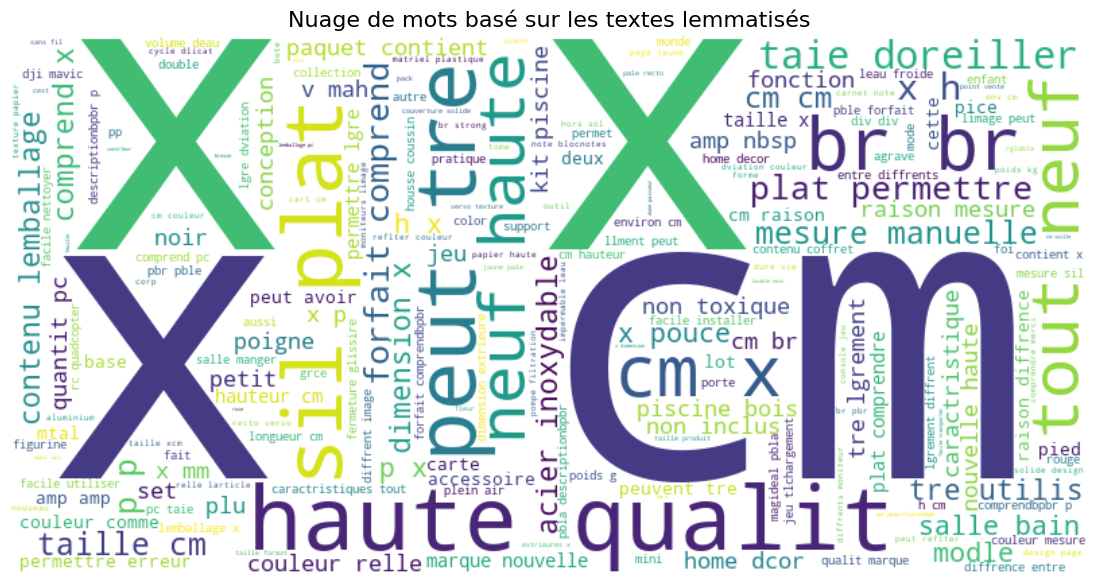

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# On concatène tous les textes lemmatisés
all_text = " ".join(df_vecteur['merged_lemmatized'])

# Création du nuage
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Affichage
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots basé sur les textes lemmatisés", fontsize=16)
plt.show()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialiser le vectorizer
vectorizer = CountVectorizer()

# Appliquer sur la colonne nettoyée/lemmatisée
X_vect = vectorizer.fit_transform(df_vecteur['merged_lemmatized'])

# (Optionnel) Voir les dimensions et les mots
print(f"Nombre de phrases vectorisées : {X_vect.shape[0]}")
print(f"Nombre de tokens uniques (features) : {X_vect.shape[1]}")
print(f"Extraits de tokens : {vectorizer.get_feature_names_out()[:10]}")


Nombre de phrases vectorisées : 52775
Nombre de tokens uniques (features) : 150257
Extraits de tokens : ['aa' 'aaa' 'aaaa' 'aaabatteries' 'aaabattery' 'aaabr'
 'aaabrbrcaractristiques' 'aaafeatures' 'aaafunction' 'aaah']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Variable cible
y = df_vecteur['category_name']

# Découpage en entraînement / test
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


c:\Users\dunca\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


=== Rapport de classification ===
                                                        precision    recall  f1-score   support

                                    Accessoires gaming       0.69      0.74      0.72       225
                                            Animalerie       0.83      0.69      0.75       104
                                        Cartes de jeux       0.86      0.94      0.90       487
                     Chaussettes bébés, petites photos       0.93      0.85      0.89        79
                                            Confiserie       0.90      0.72      0.80       122
                                      Consoles de jeux       0.85      0.91      0.88       103
                                            Décoration       0.76      0.73      0.75       681
                            Figurines et jeux de rôles       0.62      0.49      0.55       108
                         Figurines, objets pop culture       0.69      0.75      0.72       309
     

In [7]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords

# Assurez-vous d'avoir les stopwords français
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

# Fonction de nettoyage
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-ZÀ-ÿ\s]", " ", text)  # Supprimer tout ce qui n’est pas lettre ou espace
    tokens = text.split()

    # Filtrage des tokens douteux ou trop courts
    filtered_tokens = [
        t for t in tokens 
        if len(t) > 2 
        and not re.search(r"(aaa+|aa[a-z])", t)
        and t not in stop_words
    ]
    
    return " ".join(filtered_tokens)

# Application
df_vecteur['merged_cleaned'] = df_vecteur['merged'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


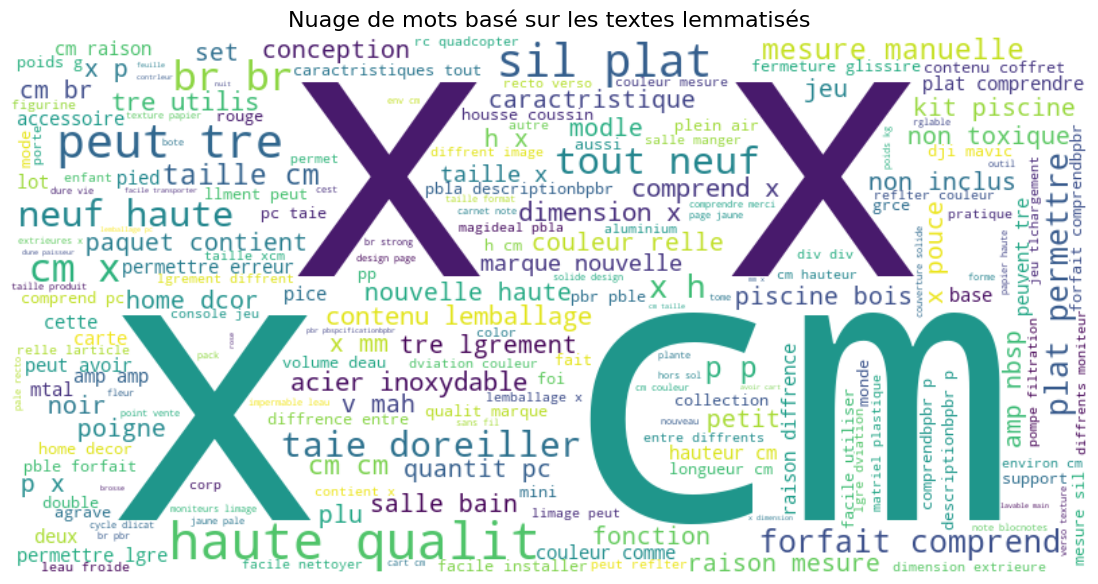

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# On concatène tous les textes lemmatisés
all_text = " ".join(df_vecteur['merged_lemmatized'])

# Création du nuage
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Affichage
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots basé sur les textes lemmatisés", fontsize=16)
plt.show()


In [9]:
y = df_vecteur['category_name']

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

model = LinearSVC()
model.fit(X_train, y_train)


c:\Users\dunca\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [10]:
y_pred = model.predict(X_test)

print("=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Rapport de classification ===
                                                        precision    recall  f1-score   support

                                    Accessoires gaming       0.69      0.74      0.72       225
                                            Animalerie       0.83      0.69      0.75       104
                                        Cartes de jeux       0.86      0.94      0.90       487
                     Chaussettes bébés, petites photos       0.93      0.85      0.89        79
                                            Confiserie       0.90      0.72      0.80       122
                                      Consoles de jeux       0.85      0.91      0.88       103
                                            Décoration       0.76      0.73      0.75       681
                            Figurines et jeux de rôles       0.62      0.49      0.55       108
                         Figurines, objets pop culture       0.69      0.75      0.72       309
     

In [11]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coeffs = model.coef_

# Pour chaque classe (si multiclasses)
for i, class_label in enumerate(model.classes_):
    top10 = np.argsort(coeffs[i])[-10:]
    print(f"\nTop mots pour la classe '{class_label}':")
    print([feature_names[j] for j in top10])



Top mots pour la classe 'Accessoires gaming':
['brancher', 'gaming', 'avis', 'bigben', 'gamegear', 'skylanders', 'gamer', 'advantage', 'stereo', 'steelbook']

Top mots pour la classe 'Animalerie':
['regl', 'forever', 'croquette', 'tan', 'harnais', 'magnetique', 'eb', 'zolux', 'laisse', 'vermiculit']

Top mots pour la classe 'Cartes de jeux':
['wow', 'vo', 'pv', 'adrenalyn', 'perfection', 'fleer', 'ccg', 'mtg', 'yugioh', 'vf']

Top mots pour la classe 'Chaussettes bébés, petites photos':
['eroslegler', 'bumper', 'flchettes', 'crocitesuprme', 'ailettes', 'bleuebce', 'babyfoot', 'mmsuprme', 'procds', 'billard']

Top mots pour la classe 'Confiserie':
['melange', 'noix', 'kambly', 'sirop', 'espresso', 'ducros', 'crmeux', 'bocal', 'barres', 'piment']

Top mots pour la classe 'Consoles de jeux':
['charbon', 'infamous', 'consola', 'roja', 'verte', 'go', 'mentespectros', 'nom', 'lagon', 'tankfat']

Top mots pour la classe 'Décoration':
['cfpj', 'lavent', 'canevas', 'photophore', 'cendrier', 'p

Epoch [1/10], Train Loss: 1.4506, Train Accuracy: 56.52%, Test Loss: 1.0111, Test Accuracy: 65.53%
Epoch [2/10], Train Loss: 0.8575, Train Accuracy: 71.02%, Test Loss: 0.7725, Test Accuracy: 76.55%
Epoch [3/10], Train Loss: 0.6705, Train Accuracy: 78.05%, Test Loss: 0.6407, Test Accuracy: 78.70%
Epoch [4/10], Train Loss: 0.5496, Train Accuracy: 83.01%, Test Loss: 0.5570, Test Accuracy: 83.96%
Epoch [5/10], Train Loss: 0.4657, Train Accuracy: 85.92%, Test Loss: 0.4942, Test Accuracy: 84.22%
Epoch [6/10], Train Loss: 0.4011, Train Accuracy: 87.82%, Test Loss: 0.4444, Test Accuracy: 85.09%
Epoch [7/10], Train Loss: 0.3516, Train Accuracy: 89.46%, Test Loss: 0.4124, Test Accuracy: 88.09%
Epoch [8/10], Train Loss: 0.3139, Train Accuracy: 90.78%, Test Loss: 0.3835, Test Accuracy: 88.24%
Epoch [9/10], Train Loss: 0.2793, Train Accuracy: 91.68%, Test Loss: 0.3657, Test Accuracy: 88.71%
Epoch [10/10], Train Loss: 0.2536, Train Accuracy: 92.62%, Test Loss: 0.3471, Test Accuracy: 90.02%


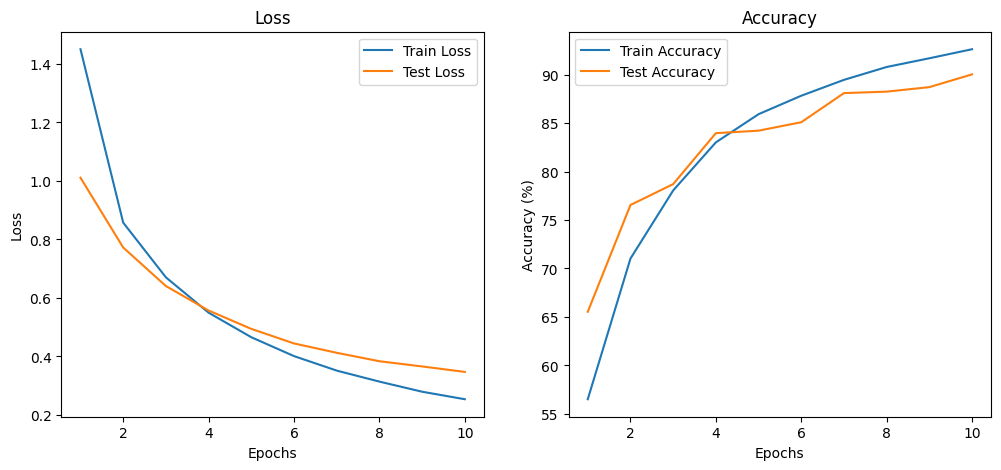

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt


# Convertir 'prdtypecode' en valeurs numériques
label_encoder_prdtype = LabelEncoder()
df_vecteur['prdtypecode'] = label_encoder_prdtype.fit_transform(df_vecteur['prdtypecode'])

# Convertir 'merged_trad' en vecteurs TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Ajustez max_features selon vos besoins
tfidf_matrix = tfidf_vectorizer.fit_transform(df_vecteur['merged'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())

# Convertir les noms de colonnes en chaînes de caractères
tfidf_df.columns = tfidf_df.columns.astype(str)

# Combiner les colonnes converties
X = pd.concat([df_vecteur[['prdtypecode']].reset_index(drop=True), tfidf_df], axis=1)
y = df_vecteur['category_name']

# Encoder les catégories textuelles
label_encoder_category = LabelEncoder()
y_encoded = label_encoder_category.fit_transform(y)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir les données en tenseurs PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Créer des DataLoader pour l'entraînement et le test
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Définir le modèle
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = X_train.shape[1]
hidden_size = 128
num_classes = len(label_encoder_category.classes_)
model = NeuralNet(input_size, hidden_size, num_classes)

# Définir la fonction de perte et l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Liste pour stocker les valeurs de perte et d'accuracy
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Entraîner le modèle
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += y_batch.size(0)
        correct_train += (predicted == y_batch).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Évaluer le modèle sur l'ensemble de test
    model.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_test += y_batch.size(0)
            correct_test += (predicted == y_batch).sum().item()

    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Tracer les courbes de perte et d'accuracy
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


Results for Random Forest:
Accuracy: 0.969019422074846
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       225
           1       0.94      0.77      0.85       104
           2       0.99      0.99      0.99       487
           3       0.97      0.85      0.91        79
           4       0.96      0.91      0.93       122
           5       0.92      0.95      0.93       103
           6       0.95      0.98      0.96       681
           7       0.97      0.87      0.92       108
           8       0.97      0.95      0.96       309
           9       0.99      1.00      0.99       636
          10       0.88      0.92      0.90       299
          11       0.93      0.87      0.90       282
          12       1.00      0.95      0.97       295
          13       0.99      0.99      0.99       165
          14       0.99      0.99      0.99       117
          15       0.92      0.97      0.95       669
   

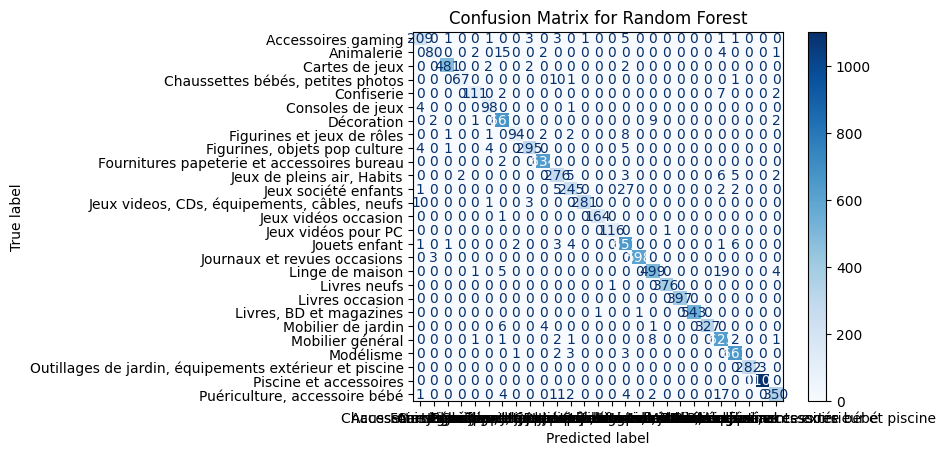

Results for KNN:
Accuracy: 0.758218853623875
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       225
           1       0.33      0.44      0.38       104
           2       0.94      0.96      0.95       487
           3       0.52      0.63      0.57        79
           4       0.66      0.60      0.63       122
           5       0.76      0.87      0.81       103
           6       0.63      0.68      0.65       681
           7       0.88      0.77      0.82       108
           8       0.85      0.86      0.86       309
           9       0.71      0.82      0.76       636
          10       0.57      0.50      0.53       299
          11       0.58      0.57      0.58       282
          12       0.93      0.86      0.90       295
          13       0.90      0.90      0.90       165
          14       0.82      0.85      0.84       117
          15       0.62      0.60      0.61       669
          16 

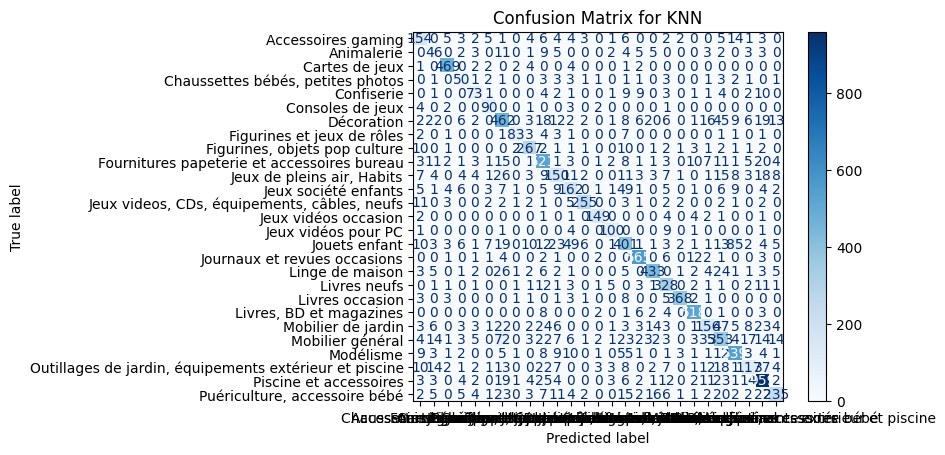

Results for SVM:
Accuracy: 0.9984841307437233
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       0.96      0.99      0.98       104
           2       1.00      1.00      1.00       487
           3       1.00      1.00      1.00        79
           4       1.00      1.00      1.00       122
           5       1.00      1.00      1.00       103
           6       1.00      1.00      1.00       681
           7       1.00      1.00      1.00       108
           8       1.00      1.00      1.00       309
           9       1.00      1.00      1.00       636
          10       1.00      1.00      1.00       299
          11       1.00      1.00      1.00       282
          12       1.00      1.00      1.00       295
          13       1.00      1.00      1.00       165
          14       0.96      0.97      0.97       117
          15       1.00      1.00      1.00       669
          16

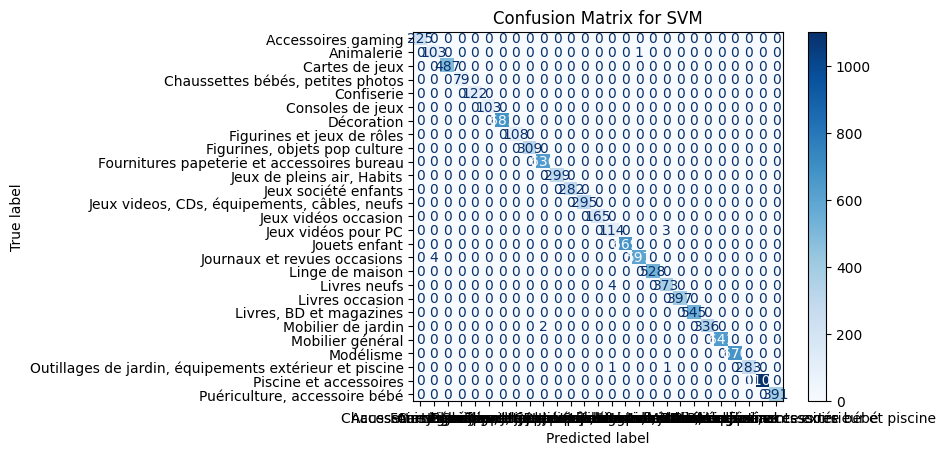

The best model is SVM with an accuracy of 0.9984841307437233


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convertir 'prdtypecode' en valeurs numériques
label_encoder_prdtype = LabelEncoder()
df_vecteur['prdtypecode'] = label_encoder_prdtype.fit_transform(df_vecteur['prdtypecode'])

# Convertir 'merged_trad' en vecteurs TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Ajustez max_features selon vos besoins
tfidf_matrix = tfidf_vectorizer.fit_transform(df_vecteur['merged'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())

# Convertir les noms de colonnes en chaînes de caractères
tfidf_df.columns = tfidf_df.columns.astype(str)

# Combiner les colonnes converties
X = pd.concat([df_vecteur[['prdtypecode']].reset_index(drop=True), tfidf_df], axis=1)
y = df_vecteur['category_name']

# Encoder les catégories textuelles
label_encoder_category = LabelEncoder()
y_encoded = label_encoder_category.fit_transform(y)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraîner et évaluer les modèles
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": confusion
    }

    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{confusion}")
    print("-" * 50)

    # Tracer la matrice de confusion
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=label_encoder_category.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Comparer les performances
best_model = max(results, key=lambda model: results[model]["accuracy"])
print(f"The best model is {best_model} with an accuracy of {results[best_model]['accuracy']}")


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Charger les données
df_vecteur = pd.read_csv('df_fusionne_clean.csv')  # Remplacez par votre source de données

# Séparer les caractéristiques et la cible
X = df_vecteur['merged']
y = df_vecteur['category_name']

# Convertir les descriptions en vecteurs TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Ajustez max_features selon vos besoins
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Encoder les catégories textuelles
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_encoded)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entraîner un modèle SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Évaluer le modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


                                                        precision    recall  f1-score   support

                                    Accessoires gaming       0.47      0.42      0.44      1115
                                            Animalerie       0.58      0.47      0.52      1147
                                        Cartes de jeux       0.73      0.31      0.43      1148
                     Chaussettes bébés, petites photos       0.71      0.58      0.64      1121
                                            Confiserie       0.48      0.57      0.52      1185
                                      Consoles de jeux       0.95      0.69      0.80      1102
                                            Décoration       0.58      0.57      0.57      1098
                            Figurines et jeux de rôles       0.31      0.10      0.15      1102
                         Figurines, objets pop culture       0.46      0.27      0.34      1131
           Fournitures papeterie et acc

Epoch [1/10], Train Loss: 1.0521, Train Accuracy: 66.79%, Test Loss: 0.6483, Test Accuracy: 79.00%
Epoch [2/10], Train Loss: 0.5120, Train Accuracy: 84.74%, Test Loss: 0.4179, Test Accuracy: 86.00%
Epoch [3/10], Train Loss: 0.3428, Train Accuracy: 89.87%, Test Loss: 0.2973, Test Accuracy: 91.54%
Epoch [4/10], Train Loss: 0.2495, Train Accuracy: 92.76%, Test Loss: 0.2387, Test Accuracy: 92.72%
Epoch [5/10], Train Loss: 0.1926, Train Accuracy: 94.62%, Test Loss: 0.1931, Test Accuracy: 94.90%
Epoch [6/10], Train Loss: 0.1541, Train Accuracy: 95.99%, Test Loss: 0.1644, Test Accuracy: 95.43%
Epoch [7/10], Train Loss: 0.1249, Train Accuracy: 96.83%, Test Loss: 0.1367, Test Accuracy: 96.56%
Epoch [8/10], Train Loss: 0.1041, Train Accuracy: 97.45%, Test Loss: 0.1186, Test Accuracy: 97.18%
Epoch [9/10], Train Loss: 0.0865, Train Accuracy: 97.91%, Test Loss: 0.1191, Test Accuracy: 96.48%
Epoch [10/10], Train Loss: 0.0746, Train Accuracy: 98.20%, Test Loss: 0.0988, Test Accuracy: 97.57%


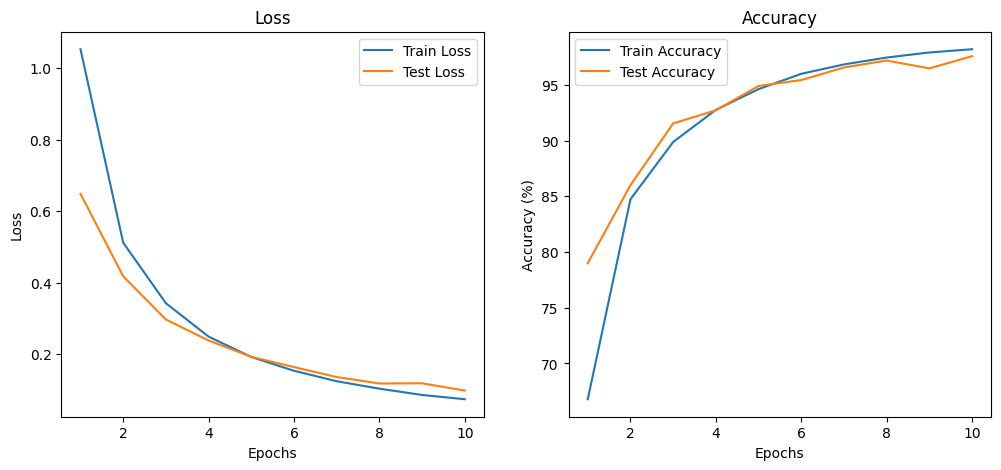

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Charger les données
df_vecteur = pd.read_csv('df_fusionne_clean.csv')  # Remplacez par votre source de données

# Convertir 'prdtypecode' en valeurs numériques
label_encoder_prdtype = LabelEncoder()
df_vecteur['prdtypecode'] = label_encoder_prdtype.fit_transform(df_vecteur['prdtypecode'])

# Convertir 'merged_trad' en vecteurs TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Ajustez max_features selon vos besoins
tfidf_matrix = tfidf_vectorizer.fit_transform(df_vecteur['merged'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())

# Convertir les noms de colonnes en chaînes de caractères
tfidf_df.columns = tfidf_df.columns.astype(str)

# Combiner les colonnes converties
X = pd.concat([df_vecteur[['prdtypecode']].reset_index(drop=True), tfidf_df], axis=1)
y = df_vecteur['category_name']

# Encoder les catégories textuelles
label_encoder_category = LabelEncoder()
y_encoded = label_encoder_category.fit_transform(y)

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir les données en tenseurs PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Créer des DataLoader pour l'entraînement et le test
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Définir le modèle
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = X_train.shape[1]
hidden_size = 128
num_classes = len(label_encoder_category.classes_)
model = NeuralNet(input_size, hidden_size, num_classes)

# Définir la fonction de perte et l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Liste pour stocker les valeurs de perte et d'accuracy
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Entraîner le modèle
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += y_batch.size(0)
        correct_train += (predicted == y_batch).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Évaluer le modèle sur l'ensemble de test
    model.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_test += y_batch.size(0)
            correct_test += (predicted == y_batch).sum().item()

    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Tracer les courbes de perte et d'accuracy
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Charger les données
df_vecteur = pd.read_csv('df_fusionne_clean.csv')  # Remplacez par votre source de données

# Convertir 'prdtypecode' en valeurs numériques
label_encoder_prdtype = LabelEncoder()
df_vecteur['prdtypecode'] = label_encoder_prdtype.fit_transform(df_vecteur['prdtypecode'])

# Convertir 'merged_trad' en vecteurs TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Ajustez max_features selon vos besoins
tfidf_matrix = tfidf_vectorizer.fit_transform(df_vecteur['merged'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())

# Convertir les noms de colonnes en chaînes de caractères
tfidf_df.columns = tfidf_df.columns.astype(str)

# Combiner les colonnes converties
X = pd.concat([df_vecteur[['prdtypecode']].reset_index(drop=True), tfidf_df], axis=1)
y = df_vecteur['category_name']

# Encoder les catégories textuelles
label_encoder_category = LabelEncoder()
y_encoded = label_encoder_category.fit_transform(y)

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entraîner un modèle XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Évaluer le modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder_category.classes_))

# Afficher l'importance des caractéristiques
importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


c:\Users\dunca\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                                                        precision    recall  f1-score   support

                                    Accessoires gaming       1.00      1.00      1.00      1115
                                            Animalerie       1.00      1.00      1.00      1147
                                        Cartes de jeux       1.00      1.00      1.00      1148
                     Chaussettes bébés, petites photos       1.00      1.00      1.00      1121
                                            Confiserie       1.00      1.00      1.00      1185
                                      Consoles de jeux       1.00      1.00      1.00      1102
                                            Décoration       1.00      1.00      1.00      1098
                            Figurines et jeux de rôles       1.00      1.00      1.00      1102
                         Figurines, objets pop culture       1.00      1.00      1.00      1131
           Fournitures papeterie et acc

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Charger les données
df_vecteur = pd.read_csv('df_fusionne_clean.csv')  # Remplacez par votre source de données

# Convertir 'prdtypecode' en valeurs numériques
label_encoder_prdtype = LabelEncoder()
df_vecteur['prdtypecode'] = label_encoder_prdtype.fit_transform(df_vecteur['prdtypecode'])

# Convertir 'merged_trad' en vecteurs TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Ajustez max_features selon vos besoins
tfidf_matrix = tfidf_vectorizer.fit_transform(df_vecteur['merged'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())

# Convertir les noms de colonnes en chaînes de caractères
tfidf_df.columns = tfidf_df.columns.astype(str)

# Combiner les colonnes converties
X = pd.concat([df_vecteur[['prdtypecode']].reset_index(drop=True), tfidf_df], axis=1)
y = df_vecteur['category_name']

# Encoder les catégories textuelles
label_encoder_category = LabelEncoder()
y_encoded = label_encoder_category.fit_transform(y)

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entraîner un modèle XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Évaluer le modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder_category.classes_))

# Afficher l'importance des caractéristiques
importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


c:\Users\dunca\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:43:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                                                        precision    recall  f1-score   support

                                    Accessoires gaming       1.00      1.00      1.00      1115
                                            Animalerie       1.00      1.00      1.00      1147
                                        Cartes de jeux       1.00      1.00      1.00      1148
                     Chaussettes bébés, petites photos       1.00      1.00      1.00      1121
                                            Confiserie       1.00      1.00      1.00      1185
                                      Consoles de jeux       1.00      1.00      1.00      1102
                                            Décoration       1.00      1.00      1.00      1098
                            Figurines et jeux de rôles       1.00      1.00      1.00      1102
                         Figurines, objets pop culture       1.00      1.00      1.00      1131
           Fournitures papeterie et acc

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from autosklearn.classification import AutoSklearnClassifier
from sklearn.metrics import classification_report

# Charger les données
df_vecteur = pd.read_csv('df_fusionne_clean.csv')  # Remplacez par votre source de données

# Convertir 'prdtypecode' en valeurs numériques
label_encoder_prdtype = LabelEncoder()
df_vecteur['prdtypecode'] = label_encoder_prdtype.fit_transform(df_vecteur['prdtypecode'])

# Convertir 'merged_trad' en vecteurs TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Ajustez max_features selon vos besoins
tfidf_matrix = tfidf_vectorizer.fit_transform(df_vecteur['merged'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())

# Convertir les noms de colonnes en chaînes de caractères
tfidf_df.columns = tfidf_df.columns.astype(str)

# Combiner les colonnes converties
X = pd.concat([df_vecteur[['prdtypecode']].reset_index(drop=True), tfidf_df], axis=1)
y = df_vecteur['category_name']

# Encoder les catégories textuelles
label_encoder_category = LabelEncoder()
y_encoded = label_encoder_category.fit_transform(y)

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Utiliser Auto-sklearn pour l'AutoML
automl = AutoSklearnClassifier(time_left_for_this_task=3600, per_run_time_limit=300, n_jobs=-1)
automl.fit(X_train, y_train)

# Évaluer le modèle
print(automl.score(X_test, y_test))

# Afficher le rapport de classification
y_pred = automl.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder_category.classes_))

# Afficher le meilleur modèle trouvé
print(automl.show_models())
